In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.model_selection import train_test_split

In [27]:
# Import data
data = np.load("/Users/zhangfengzhe/Desktop/UROP/Wild Fire UROP/all_304_fire_combine_all_feature_512_wind_precipitation_new.npy")
data.shape

(304, 512, 512, 15)

In [29]:
m, n_H, n_W, n_C = data.shape

In [61]:
train_x = data[:, :, :, 0:14]
train_y = data[:, :, :, 14]

In [62]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)

print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(val_x.shape[0]))
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("val_x shape: " + str(val_x.shape))
print ("val_y shape: " + str(val_y.shape))

number of training examples = 273
number of test examples = 31
train_x shape: (273, 512, 512, 14)
train_y shape: (273, 512, 512)
val_x shape: (31, 512, 512, 14)
val_y shape: (31, 512, 512)


In [35]:
# Define the model
def conv_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    
    Z1 = tfl.Conv2D(8, (4, 4), padding='same')(input_img)
    B1 = tfl.BatchNormalization()(Z1)
    A1 = tfl.ReLU()(B1)
    Z2 = tfl.Conv2D(16, (2, 2), padding='same')(A1)
    B2 = tfl.BatchNormalization()(Z2)
    A2 = tfl.ReLU()(B2)
    outputs = tfl.Conv2D(1, (4, 4), padding='same')(A2)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [36]:
model1 = conv_model((512, 512, 14))

In [37]:
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 512, 512, 14)]    0         
                                                                 
 conv2d_9 (Conv2D)           (None, 512, 512, 8)       1800      
                                                                 
 batch_normalization_6 (Batc  (None, 512, 512, 8)      32        
 hNormalization)                                                 
                                                                 
 re_lu_6 (ReLU)              (None, 512, 512, 8)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 512, 512, 16)      528       
                                                                 
 batch_normalization_7 (Batc  (None, 512, 512, 16)     64        
 hNormalization)                                           

In [38]:
train_x.shape

(273, 512, 512, 14)

In [41]:
history = model1.fit(train_x, train_y, batch_size=1, epochs=5)

Epoch 1/5
273/273 [==============================] - 132s 481ms/step - loss: 33.2941 - accuracy: 0.9433
Epoch 2/5
273/273 [==============================] - 123s 449ms/step - loss: 32.8346 - accuracy: 0.9162
Epoch 3/5
273/273 [==============================] - 129s 472ms/step - loss: 32.6426 - accuracy: 0.9436
Epoch 4/5
273/273 [==============================] - 365s 1s/step - loss: 32.5767 - accuracy: 0.9430
Epoch 5/5
273/273 [==============================] - 110s 404ms/step - loss: 32.5187 - accuracy: 0.9397


(1, 512, 512, 14)


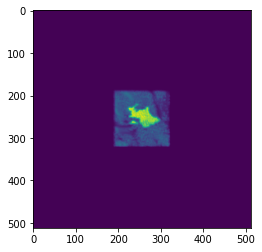

In [83]:
index = 272

sample1 = np.array([data[index, :, :, 0:14]])
print(sample1.shape)

result = np.array(model1(sample1))[0]
result.shape


plt.imshow(result) # Display the predicted image
plt.show()

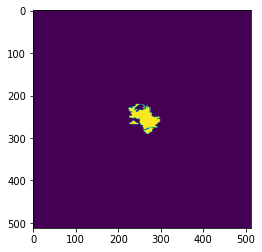

In [84]:
plt.imshow(data[index, :, :, 14]) # Display the label image
plt.show()

In [63]:
# Evaluate the model based on the test samples
model1.evaluate(val_x, val_y)

1/1 [==============================] - 1s 1s/step - loss: 35.2744 - accuracy: 0.9461


[35.274356842041016, 0.9460809826850891]

In [85]:
!mkdir -p saved_model
model1.save('saved_model/wild_fire_model')

INFO:tensorflow:Assets written to: saved_model/wild_fire_model/assets


INFO:tensorflow:Assets written to: saved_model/wild_fire_model/assets
